In [1]:
from RL_cliff.environment import *
from RL_cliff.learning_algorithm import *

In [2]:
env = Cliff()
print("********** TRAINING SCRN **********")
stats_SCRN = discrete_SCRN(env, num_episodes=5000)
print("********** TRAINING SPG ********")
stats_DPG = discrete_policy_gradient(env, num_episodes=5000)

********** TRAINING SCRN **********
===== FINISHED EPISODE 0 =========
===== FINISHED EPISODE 1000 =========
===== FINISHED EPISODE 2000 =========
===== FINISHED EPISODE 3000 =========
===== FINISHED EPISODE 4000 =========
********** TRAINING SPG ********
========== FINISHED EPISODE 0 ==============
========== FINISHED EPISODE 1000 ==============
========== FINISHED EPISODE 2000 ==============
========== FINISHED EPISODE 3000 ==============
========== FINISHED EPISODE 4000 ==============


<Figure size 640x480 with 0 Axes>

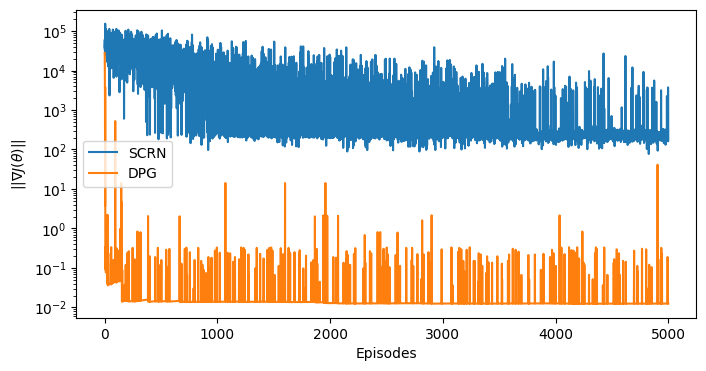

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
plt.figure(figsize=(8, 4))
plt.semilogy(stats_SCRN["gradients"], label="SCRN")
plt.semilogy(stats_DPG["gradients"], label="DPG")
plt.ylabel(r"$\vert \vert \nabla J(\theta) \vert \vert$")
plt.xlabel("Episodes")
plt.legend(loc="best")
plt.show()

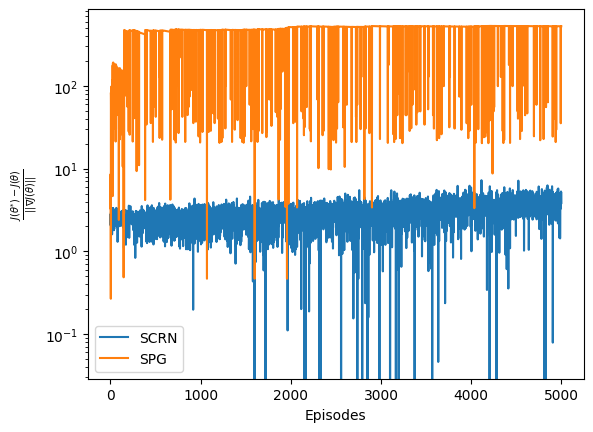

In [4]:
plt.figure()
plt.semilogy((stats_SCRN["optimum"] - stats_SCRN["objectives"])/stats_SCRN["gradients"], label="SCRN")
plt.semilogy((stats_DPG["optimum"] - stats_DPG["objectives"])/stats_DPG["gradients"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$\frac{J(\theta^{*}) - J(\theta)}{\vert \vert \nabla J(\theta) \vert \vert}$")
plt.show()

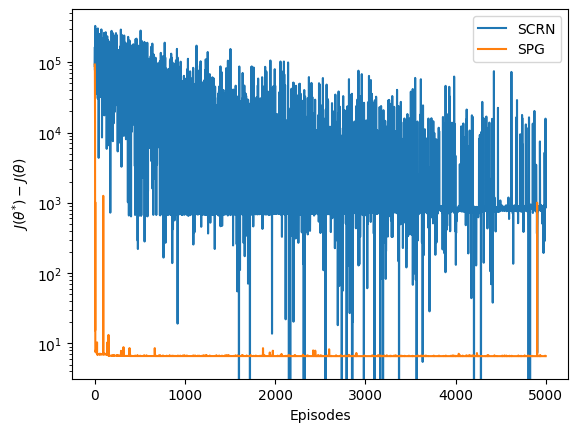

In [5]:
plt.figure()
plt.semilogy((stats_SCRN["optimum"] - stats_SCRN["objectives"]), label="SCRN")
plt.semilogy((stats_DPG["optimum"] - stats_DPG["objectives"]), label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$J(\theta^{*}) - J(\theta)$")
plt.show()